In [57]:
patches = [
    'https://lore.kernel.org/lkml/20200710084841.1933254-1-yanziily@gmail.com/raw',
    'https://lore.kernel.org/lkml/8325438e25a3a5a7e6d12ef6ede8f4350e4c65be.1594500029.git.mail@maciej.szmigiero.name/raw',
    'https://lore.kernel.org/lkml/20200619224334.GA7857@embeddedor/raw',
    'https://lore.kernel.org/lkml/f4297017-1d27-741d-3abc-36b6918801f6@linuxfoundation.org/raw',
    'https://lore.kernel.org/lkml/20200710092035.28919-1-ethercflow@gmail.com/raw',
    'https://lore.kernel.org/lkml/20200708202650.GA3866@embeddedor/raw',
    'https://lore.kernel.org/lkml/20200710183350.GA8376@embeddedor/raw',
    'https://lore.kernel.org/lkml/20200707212954.26487-1-oshpigelman@habana.ai/raw',
    'https://lore.kernel.org/lkml/20200710051043.899291-1-kamalesh@linux.vnet.ibm.com/raw',
    'https://lore.kernel.org/lkml/20200710152559.1645827-1-vkuznets@redhat.com/raw'
]

In [58]:
from pasta_utils import get_sent_ids, get_gm_ids
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [94]:
percents = []
actual_sent_ids = []
for patch_url in tqdm(patches):
    sent_ids = get_sent_ids(patch_url)
    gm_ids = set(get_gm_ids(patch_url))
    percents.append(len(gm_ids.intersection(set(sent_ids))) / len(gm_ids))
    actual_sent_ids += sent_ids
    

100%|██████████| 10/10 [00:57<00:00,  5.73s/it]


In [49]:
cnt = dict()

for id in actual_sent_ids:
    if id in cnt:
        cnt[id] +=1
    else:
        cnt[id] = 1

In [52]:
cnt = sorted(cnt.items(), key = lambda x: x[1], reverse=True)

In [53]:
cnt

[('linux-kernel@vger.kernel.org', 10),
 ('gregkh@linuxfoundation.org', 2),
 ('gustavo@embeddedor.com', 2),
 ('linux-kselftest@vger.kernel.org', 2),
 ('sre@kernel.org', 1),
 ('linux-pm@vger.kernel.org', 1),
 ('jiangfei1@xiaomi.com', 1),
 ('huangqiwu@xiaomi.com', 1),
 ('jdelvare@suse.com', 1),
 ('linux@roeck-us.net', 1),
 ('linux-hwmon@vger.kernel.org', 1),
 ('dan.j.williams@intel.com', 1),
 ('vkoul@kernel.org', 1),
 ('dmaengine@vger.kernel.org', 1),
 ('torvalds@linux-foundation.org', 1),
 ('jarkko.sakkinen@linux.intel.com', 1),
 ('ast@kernel.org', 1),
 ('daniel@iogearbox.net', 1),
 ('netdev@vger.kernel.org', 1),
 ('bpf@vger.kernel.org', 1),
 ('ethercflow@gmail.com', 1),
 ('marcel@holtmann.org', 1),
 ('johan.hedberg@gmail.com', 1),
 ('linux-bluetooth@vger.kernel.org', 1),
 ('gustavoars@kernel.org', 1),
 ('devel@driverdev.osuosl.org', 1),
 ('oded.gabbay@gmail.com', 1),
 ('jpoimboe@redhat.com', 1),
 ('jikos@kernel.org', 1),
 ('mbenes@suse.cz', 1),
 ('pmladek@suse.com', 1),
 ('joe.lawrence@

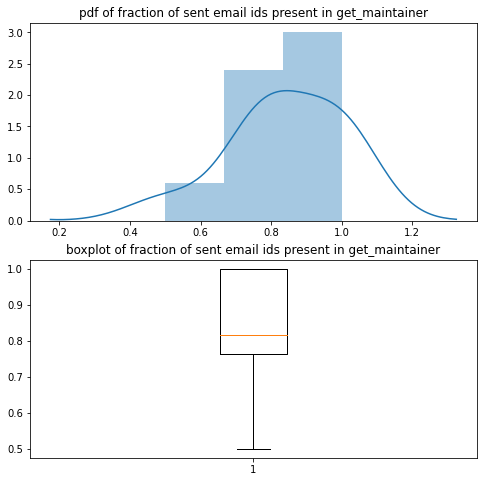

In [93]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot("211")
plt.title("pdf of fraction of sent email ids present in get_maintainer")
sns.distplot(percents)
ax2 = fig.add_subplot("212")
plt.title("boxplot of fraction of sent email ids present in get_maintainer")
plt.boxplot(percents)
plt.show()

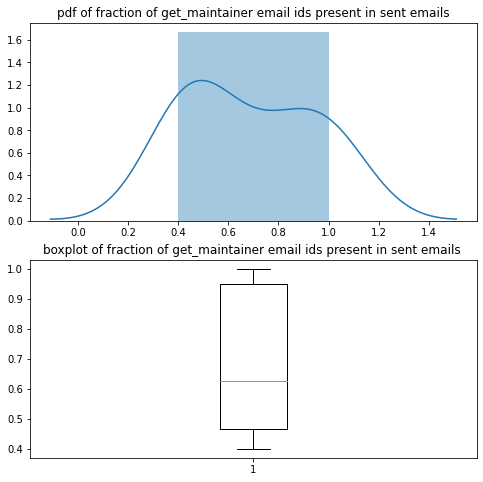

In [95]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot("211")
plt.title("pdf of fraction of get_maintainer email ids present in sent emails")
sns.distplot(percents)
ax2 = fig.add_subplot("212")
plt.title("boxplot of fraction of get_maintainer email ids present in sent emails ")
plt.boxplot(percents)
plt.show()

In [27]:
plt.boxplot()

[1.0,
 0.8,
 0.4,
 0.42857142857142855,
 0.45454545454545453,
 1.0,
 0.75,
 0.5,
 1.0,
 0.5]